In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
%matplotlib inline

from ta_scanner.data import load_and_cache, IbDataFetcher, db_data_fetch_between
from ta_scanner.models import gen_engine

In [2]:
import nest_asyncio
nest_asyncio.apply()

colors = {
    "pink": "#ff1493"
}

In [3]:
ib_data_fetcher = IbDataFetcher()

In [4]:
engine = gen_engine()

In [141]:
symbol = "/M6E"

sd = datetime.date(2020, 7, 30)
ed = datetime.date(2020, 8, 13)

df = db_data_fetch_between(engine, symbol, sd, ed)


# df = load_and_cache(
#     symbol,
#     ib_data_fetcher,
#     start_date=datetime.date(2020, 7, 30),
#     end_date=datetime.date(2020, 8, 8),
# #     use_rth=False,
# #     groupby_minutes=1,
# )
# df.drop(['id'], axis=1, inplace=True)

In [142]:
df

,id,ts,symbol,open,close,high,low,average,volume,bar_count,rth
0,481,2020-07-30 04:00:00+00:00,/M6E,1.18,1.18,1.18,1.18,1.18,21,12,False
1,482,2020-07-30 04:01:00+00:00,/M6E,1.18,1.18,1.18,1.18,1.18,6,4,False
2,483,2020-07-30 04:02:00+00:00,/M6E,1.18,1.18,1.18,1.18,1.18,3,3,False
3,484,2020-07-30 04:03:00+00:00,/M6E,1.18,1.18,1.18,1.18,1.18,8,7,False
4,485,2020-07-30 04:04:00+00:00,/M6E,1.18,1.18,1.18,1.18,1.18,4,4,False
...,...,...,...,...,...,...,...,...,...,...,...
8275,12056,2020-08-07 03:55:00+00:00,/M6E,1.19,1.19,1.19,1.19,1.19,7,6,False
8276,12057,2020-08-07 03:56:00+00:00,/M6E,1.19,1.19,1.19,1.19,1.19,6,2,False
8277,12058,2020-08-07 03:57:00+00:00,/M6E,1.19,1.19,1.19,1.19,1.19,8,6,False
8278,12059,2020-08-07 03:58:00+00:00,/M6E,1.19,1.19,1.19,1.19,1.19,17,8,False


In [143]:
df['date'] = df['ts'].dt.date

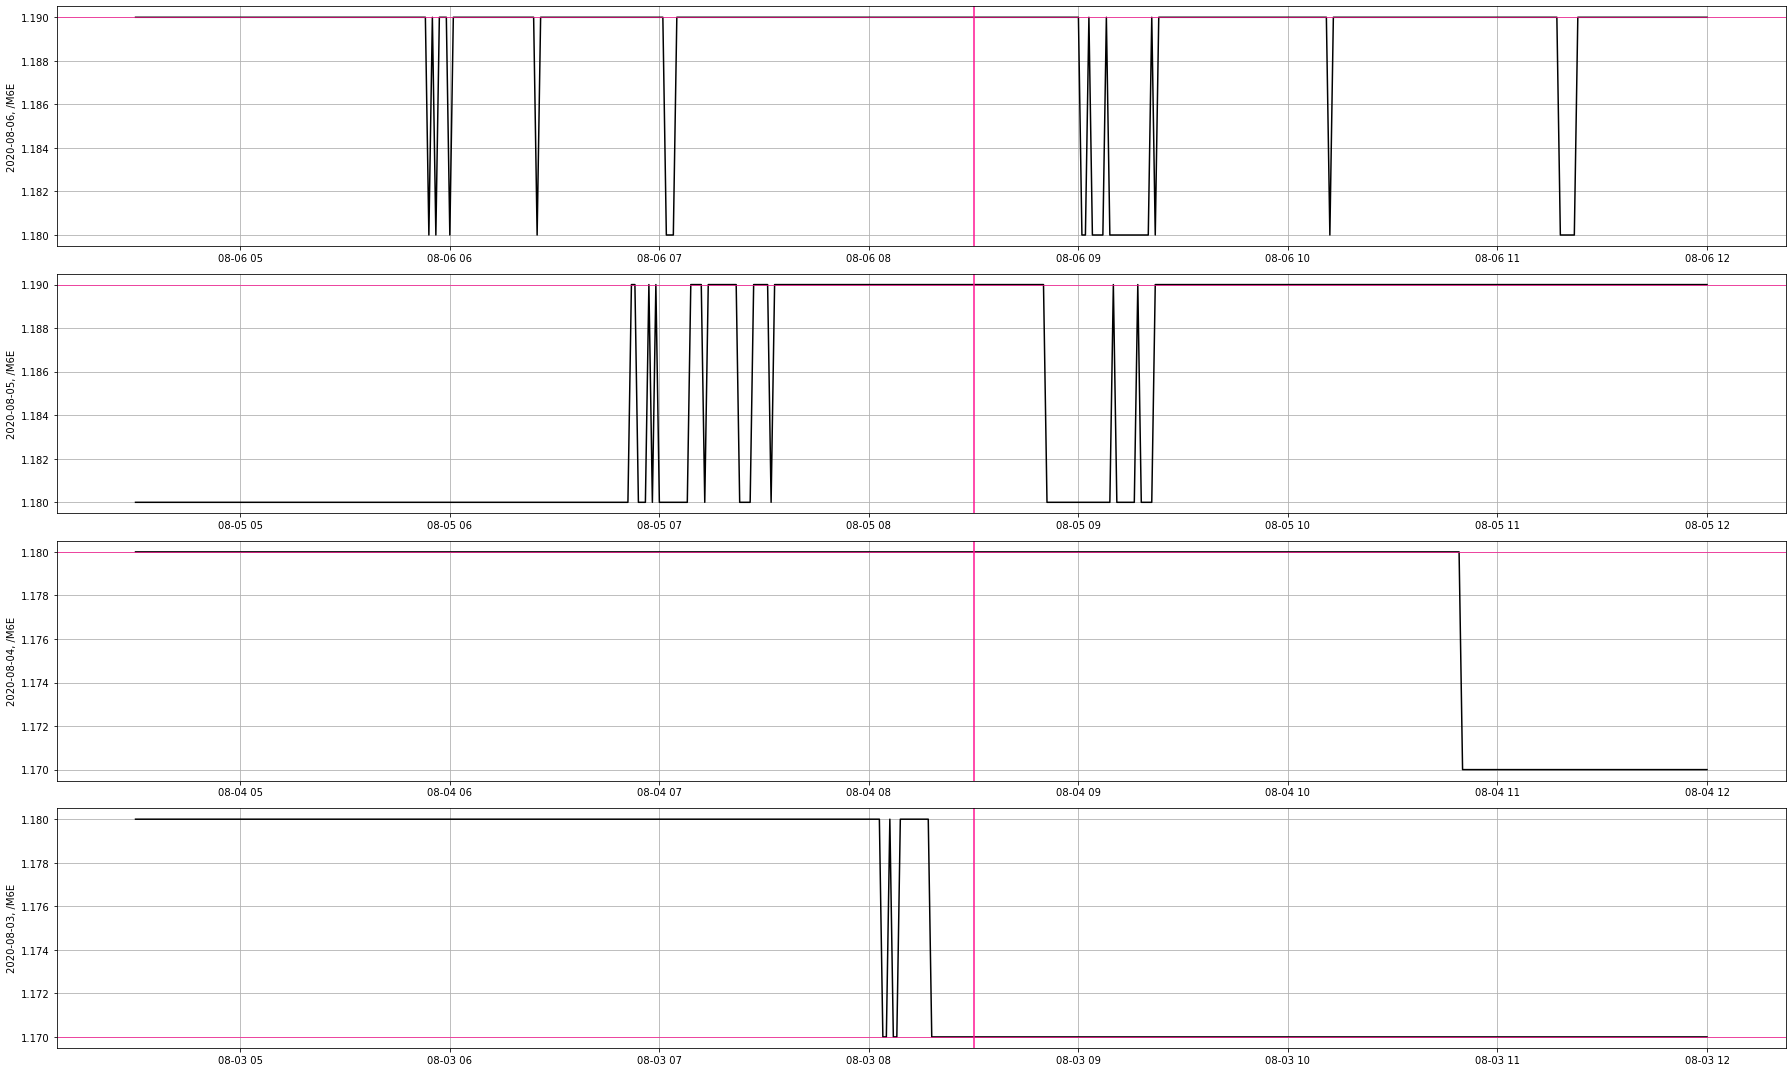

In [144]:
fig = plt.figure(figsize=(25, 15))

num_days = 4

dates = []
for k, v in df.groupby('date'):
    v.set_index('ts', inplace=True)

    if len(v.between_time('6:30', '9:00')) > 10:
        dates.append(k)

gs = gridspec.GridSpec(num_days, 1, height_ratios=([1] * num_days))

for i, date in enumerate(reversed(dates[-num_days:])):
    ax = plt.subplot(gs[i])
    idf = df.query("date == @date").copy()
    idf.set_index('ts', inplace=True)
    idf = idf.between_time('4:30', '12:00').copy()
    
    idf.sort_index(inplace=True)

    ax.plot(idf.close, color='black')
    ax.grid(True)
    ax.set_ylabel(f"{date}, {symbol}")
    
    for index, row in idf[(idf.index.hour == 8) & (idf.index.minute == 30)].iterrows():
        ax.axvline(index, color=colors["pink"], linestyle='solid')
        ax.axhline(row.close, color=colors["pink"], linestyle='solid', lw=0.7)
    
fig.tight_layout()

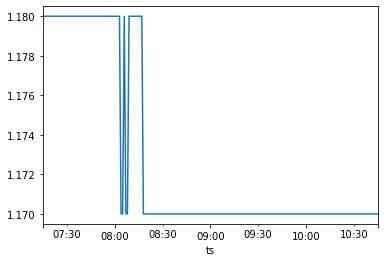

In [145]:
# idf.query("6 < index.hour").query("index.hour < 10")
idf.between_time('7:15', '10:45').close.plot()

In [146]:
grouped = df.groupby('date').sum().reset_index()
grouped.sort_values('date', ascending=False)

for k, v in df.groupby('date'):
    if k.weekday() in [5, 6]:
        continue
    
    msg = f"{k}. {v.ts.values[0]} - {v.ts.values[-1]}. {len(v.index)}"
    print(msg)

2020-07-30. 2020-07-30T04:00:00.000000000 - 2020-07-30T23:59:00.000000000. 1140
2020-07-31. 2020-07-31T00:00:00.000000000 - 2020-07-31T18:59:00.000000000. 1140
2020-08-03. 2020-08-03T00:00:00.000000000 - 2020-08-03T23:59:00.000000000. 1380
2020-08-04. 2020-08-04T11:50:00.000000000 - 2020-08-04T11:49:00.000000000. 1380
2020-08-05. 2020-08-05T04:08:00.000000000 - 2020-08-05T23:59:00.000000000. 1380
2020-08-06. 2020-08-06T00:00:00.000000000 - 2020-08-06T23:59:00.000000000. 1380
2020-08-07. 2020-08-07T00:00:00.000000000 - 2020-08-07T03:59:00.000000000. 240
